Importing Necessary Libraries:

In [3]:
import pandas as pd
import numpy as np
from IPython.display import display
import visuals as vs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the Dataset:

In [4]:
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Dataset might be missing")

Wholesale customers dataset has 440 samples with 6 features each.


# Data Exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(6)
memory usage: 20.7 KB


In [6]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Implementation: Selecting Samples

To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail.

In [7]:
indices = [25,50,75]

samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16165,4230,7595,201,4003,57
1,6269,1095,1980,3860,609,2162
2,20398,1137,3,4407,3,975


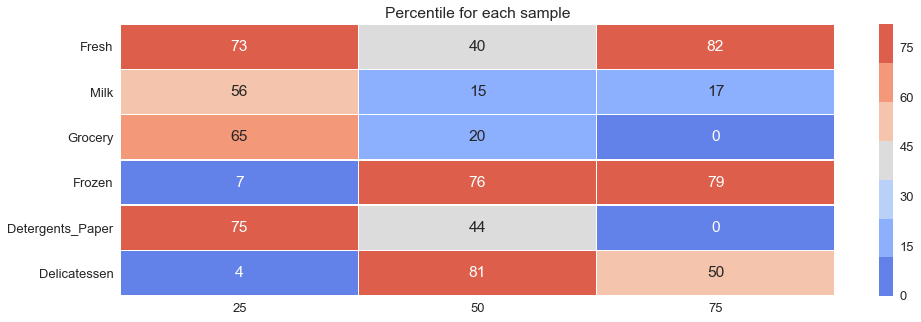

In [8]:
plt.figure(figsize=(16,5))
sns.set(font_scale = 1.3)
plt.title("Percentile for each sample")
pct = (data.rank(pct=True).loc[indices]*100).astype(int)
sns.heatmap(pct.transpose(), linewidth = 0.5, cmap=sns.color_palette("coolwarm", 7), annot = True)
plt.show()

### Customer Index : 25 (Index 0)
* Major Spending: Fresh, DetergentS_Paper (Based on "HeatMap" & "> mean_value")
* Medium Spending: Milk, Grocery (Based on "HeatMap" & "Around mean_value")
* Minor Spending: Frozen, Delicatessen (Based on "HeatMap" & "< mean_value")
* **Conclusion: Small Retail Store.**

### Customer Index : 50 (Index 1)
* Major Spending: Frozen, Delicatessen (Based on "HeatMap" & "> mean_value")
* Medium Spending: Fresh, Detergents_Paper (Based on "HeatMap" & "Around mean_value")
* Minor Spending: Milk, Grocery (Based on "HeatMap" & "< mean_value")
* **Conclusion: Resturent**

### Customer Index : 75 (Index 2)
* Major Spending: Frozen, Fresh (Based on "HeatMap" & "> mean_value")
* Medium Spending: Delicatessen (Based on "HeatMap" & "Around mean_value")
* Minor Spending: Milk, Grocery, Detergents_Paper (Based on "HeatMap" & "< mean_value")
* **Conclusion: Supplier (with Small Resturent Business) / Supermarket (with attached Small Resturent)**

## Implementation: Feature Relevance

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

features = list(data.columns)
for feature in features:
    new_data = data.drop([feature], axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], test_size=0.25, random_state=42)
    reg = DecisionTreeRegressor().fit(X_train, y_train)
    score = reg.score(X_test, y_test)
    print("R2 score for {} as dependent variable: {}".format(feature, score))

R2 score for Fresh as dependent variable: -0.5373126809068114
R2 score for Milk as dependent variable: 0.2210415780036491
R2 score for Grocery as dependent variable: 0.6737553819087372
R2 score for Frozen as dependent variable: -0.222790557479589
R2 score for Detergents_Paper as dependent variable: 0.2887452975827537
R2 score for Delicatessen as dependent variable: -1.6989763618966989


- I have looped and predicted every single feature as a dependent variable with the results shown above.
- **"Delicatessen"** as a dependent variable has **Most Negative R^2 score (Relative to others).**

>Meaning, the values of the delicatessen category (feature) contain very little information about the target variable or cannot be predicted by the other features in the dataset. Therefore, the feature is NOT necessarily redundant but may contain useful information not contained in the other features.

- **"Fresh", "Frozen"** as dependent variables have **Negative R^2 scores.**

>This imply that they are necessary for identifying customers' spending habits because the remaining features cannot explain the variation in them.

- **"Detergents_Paper", "Milk"** as dependent variables have **Very Low Positve R^2 scores.**

>These low scores imply that these are necessary for identifying customers' spending habits.

- **"Grocery"** as dependent variable has **Most Positve R^2 scores (Relative to others).**

>This score is a bit far from 1 but relative to the others this appears much higher.

**Basically the Model was able to predict this feature "Grocery" easily with the help of other features. Hence, this may be NOT as necessary when compared to the other features for identifying customers' spending habits**


## Visualize Feature Distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB1DFFA390>,
      dtype=object)

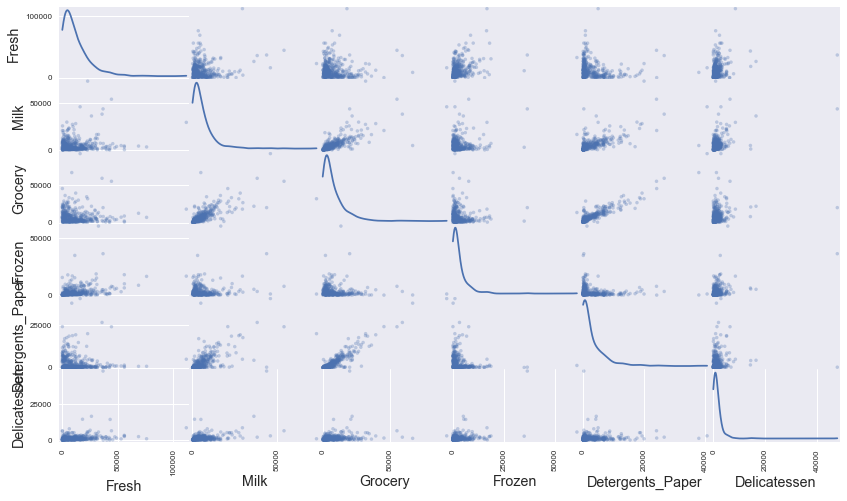

In [10]:
pd.plotting.scatter_matrix(data,alpha=0.3, figsize=(14,8), diagonal = 'kde')

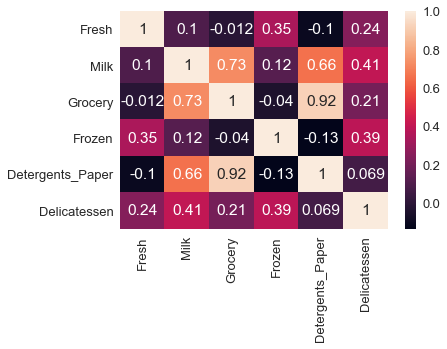

In [11]:
sns.heatmap(data.corr(), annot=True)

1. From the scatter matrix, we can see the data Is Not Normally distributed due to the presence of many outliers. Evidently, most are skewed to the left where most of the data points lie. This indicates how normalization is required to make the data features normally distributed as clustering algorithms require them to be normally distributed.

2. The following pairs of features seem to indicate some correlation:

    * **Detergents_Paper and Grocery**: We can see a linear correlation here that's apparently strongly correlated with a coefficient of 0.92.
    * **Grocery and Milk**: Another linear correlation with almost similar strength to (Detergents_Paper~Milk) of 0.73.
    * **Detergents_Paper and Milk**: Another linear correlation, but less clear than (Milk~Grocery) - with a correlation coefficient of 0.66.
3. These features that are strongly correlated does lend credence to our initial claim that Grocery may not be necessary for identifying customers' spending habits. Grocery has a high correlation with Detergents_Paper and Milk that corresponds to a relatively high R2 score when we regress Grocery on all other features. 

# Data Preprocessing:

## Implementation: Feature Scaling

C:\Users\Geekquad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB20ECDA20>,
      dtype=object)

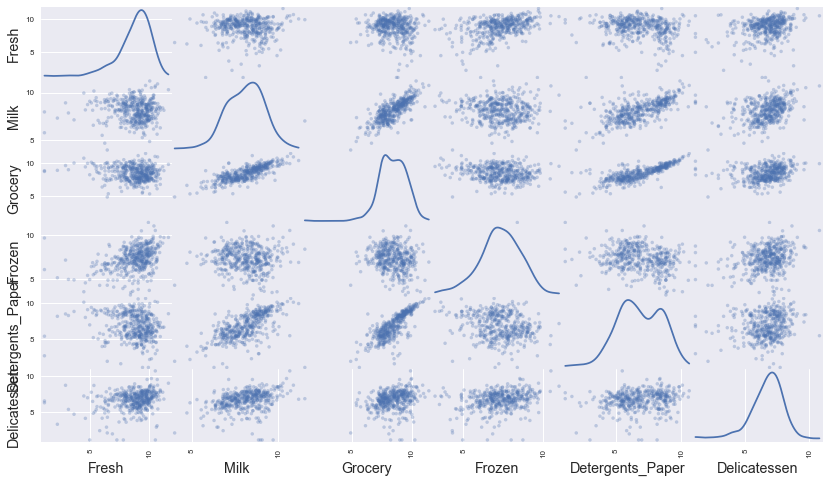

In [12]:
log_data = np.log(data)
log_samples = np.log(samples)
pd.scatter_matrix(log_data, alpha=0.3, figsize=(14,8), diagonal='kde')